In [1]:
# LOAD PACKAGES

import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import rioxarray as rxr
import geopandas as gpd
import xarray as xr
import pandas as pd
import glob
import seaborn as sns
import os
import fnmatch
import math
from math import e
from osgeo import gdal 
print("packages loaded")

packages loaded


In [37]:
# SET DIRECTORIES

# Set basin directory
basins_P_pv = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/basin_data/basin_pixel_values/'
print(sorted(os.listdir(basins_P_pv)))

# Set basin directory
basins = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/'
print(sorted(os.listdir(basins)))

out = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/outputpng/'

['12042_prob_pv.tif', '12057_prob_pv.tif', '12518_prob_pv.tif', '12524_prob_pv.tif', '12527_prob_pv.tif', '12616_prob_pv.tif', '12860_prob_pv.tif', '12997_prob_pv.tif', '13281_prob_pv.tif', '17346_prob_pv.tif', '17347_prob_pv.tif', '17987_prob_pv.tif', '19165_prob_pv.tif', '19167_prob_pv.tif', '19381_prob_pv.tif', '19384_prob_pv.tif', '19450_prob_pv.tif', '19451_prob_pv.tif', '19510_prob_pv.tif', '19512_prob_pv.tif', '19629_prob_pv.tif', '19632_prob_pv.tif', '19647_prob_pv.tif', '19649_prob_pv.tif', '19777_prob_pv.tif', '20029_prob_pv.tif', '20031_prob_pv.tif', '20253_prob_pv.tif', '20254_prob_pv.tif', '20303_prob_pv.tif', '20308_prob_pv.tif', '20384_prob_pv.tif', '20386_prob_pv.tif', '20499_prob_pv.tif', '20504_prob_pv.tif', '20650_prob_pv.tif', '20729_prob_pv.tif', '20734_prob_pv.tif', '21009_prob_pv.tif', '21078_prob_pv.tif', '21083_prob_pv.tif', '21224_prob_pv.tif', '21500_prob_pv.tif', '21513_prob_pv.tif', '21634_prob_pv.tif', '22075_prob_pv.tif', '22668_prob_pv.tif']
['.png', '12

In [40]:
# OPEN AND DISPLAY PER PIXEL PROBABILITY RASTERS
for filename in sorted(os.listdir(basins_P_pv)):
    f = os.path.join(basins_P_pv, filename)
    if filename.endswith('_prob_pv.tif'):
        # Set basin naming
        b_name = filename.split('_')
        b_name_int = b_name[0]
        
        prob = rxr.open_rasterio(f)
        a = np.mean(prob)
        prob.plot(
            cmap = 'gnuplot'
        )
        plt.title(f"Basin {b_name_int} Likelihood | Basin avg: {a:.3g}")
        #plt.title('Basin ' + b_name_int + ' pixel prediction')
        plt.axis('off')
        plt.savefig(os.path.join(out, b_name_int + '_ppp.png'))
        plt.close()
        plt.show()
        

In [41]:
for filename in sorted(os.listdir(basins)):
    f = os.path.join(basins, filename)
    if filename.endswith('.tif'):
        b_name = filename.split('_')
        b_name_int = b_name[0]
        dnbr = rxr.open_rasterio(f)
        x2 = np.mean(dnbr)
        dnbr.plot(
            cmap = 'gray'
        )
        plt.title(f"Basin {b_name_int} dNBR Values | Basin X2: {x2:.3g}")
        #plt.title('Basin ' + b_name_int + ' dnbr values, ' + 'x2: ' + str())
        plt.axis('off')
        plt.savefig(os.path.join(out, b_name_int + '_bdnbr.png'))
        plt.close()
        plt.show()

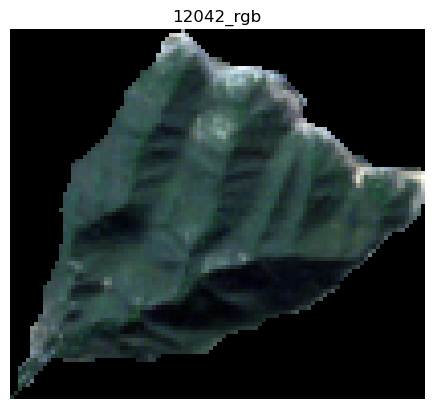

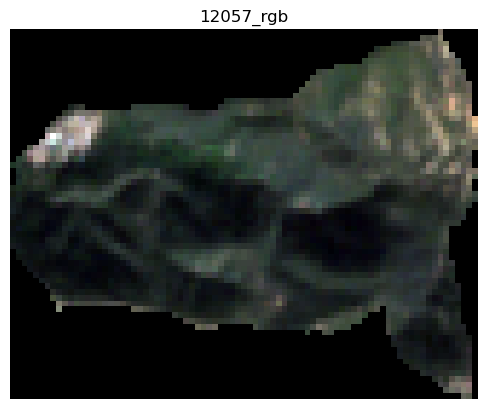

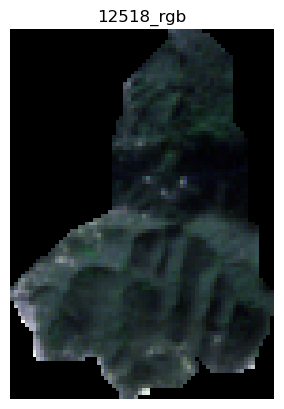

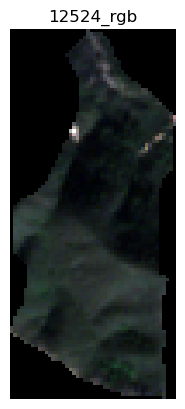

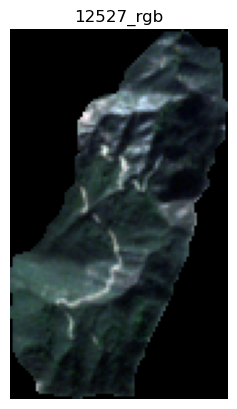

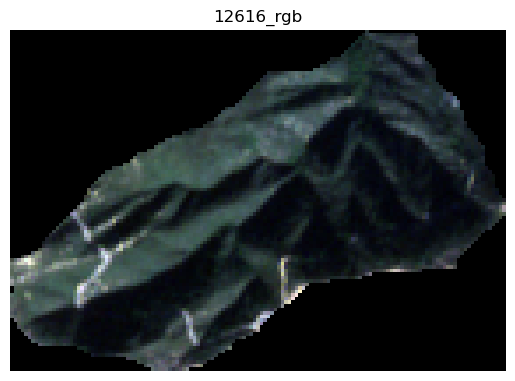

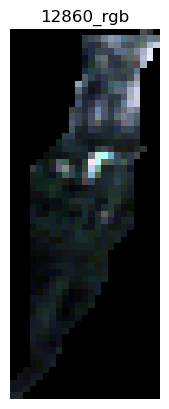

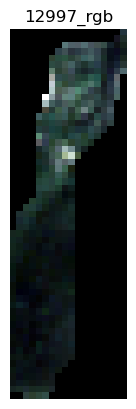

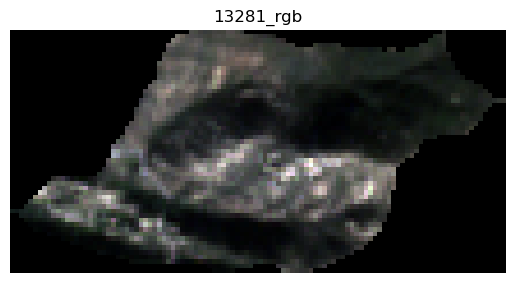

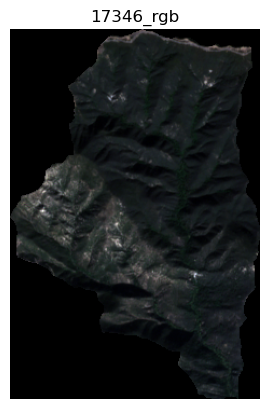

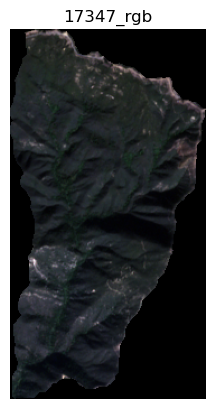

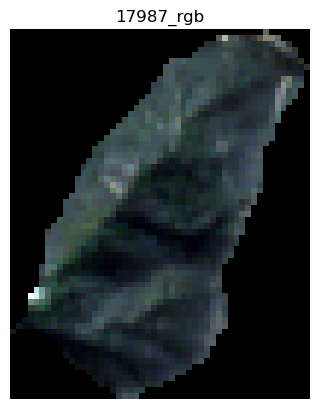

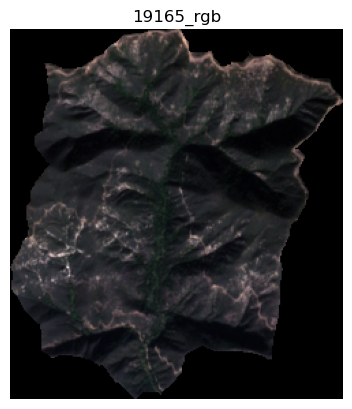

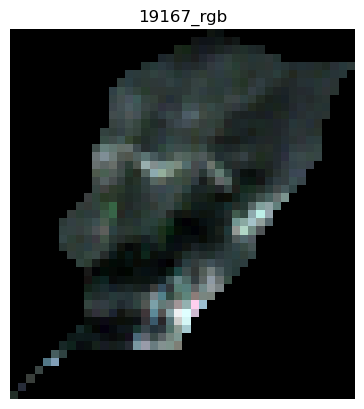

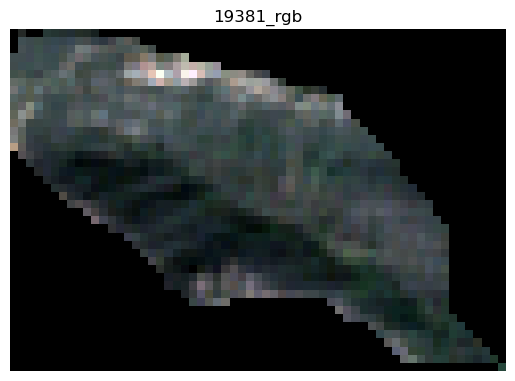

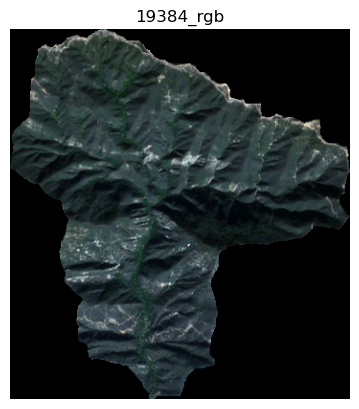

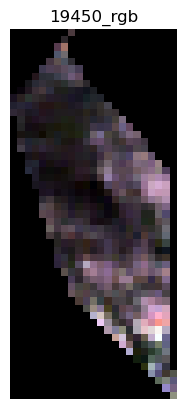

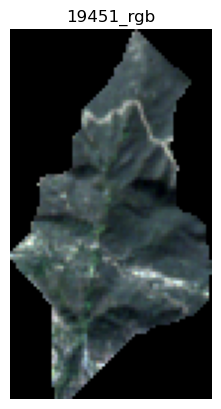

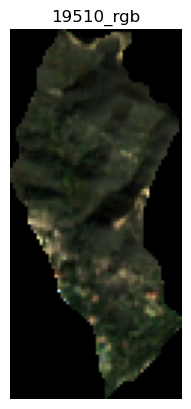

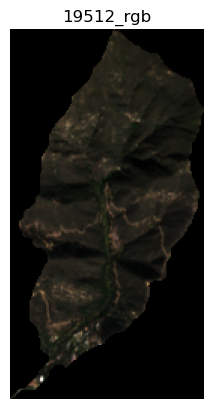

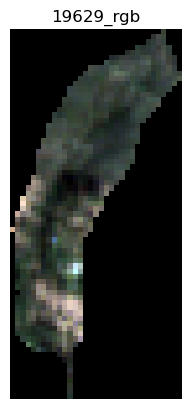

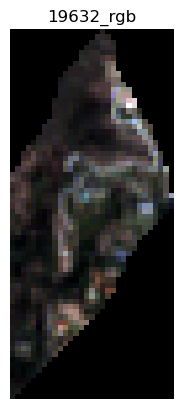

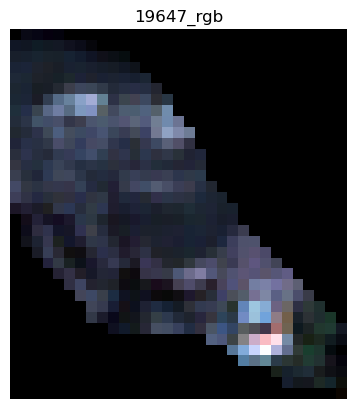

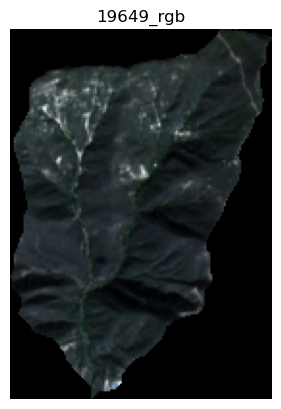

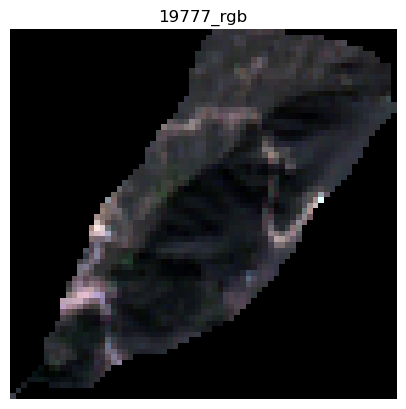

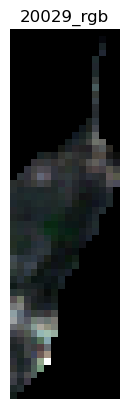

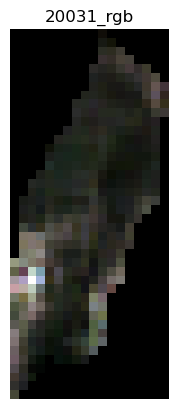

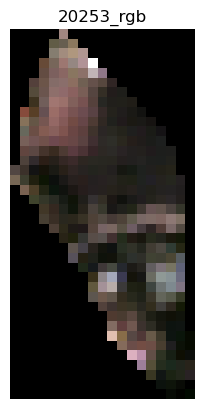

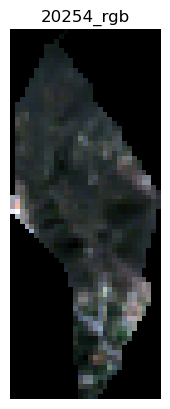

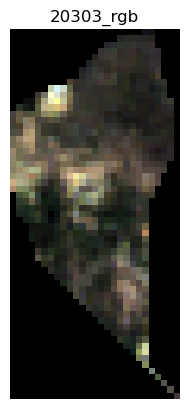

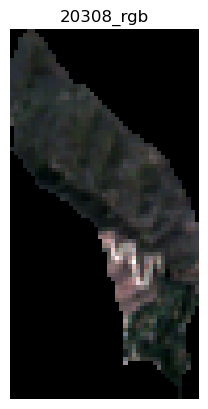

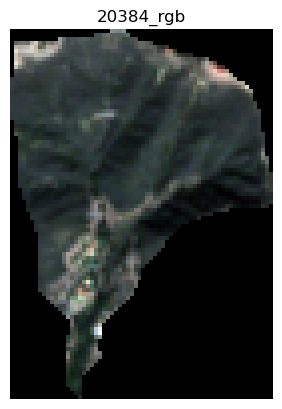

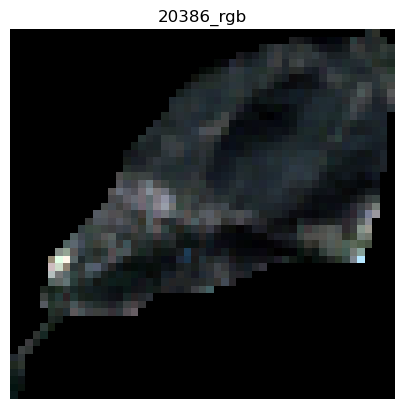

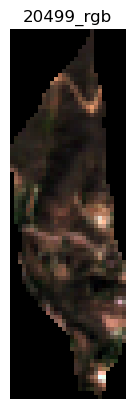

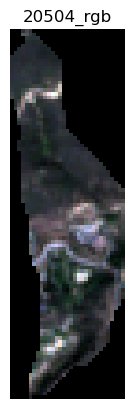

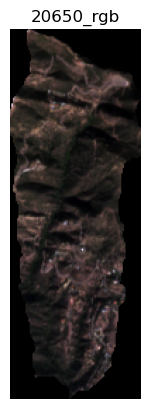

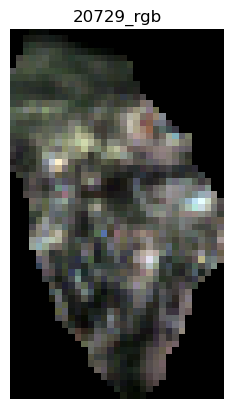

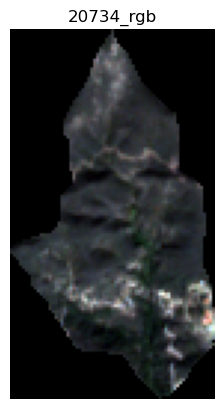

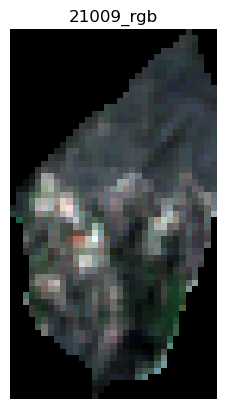

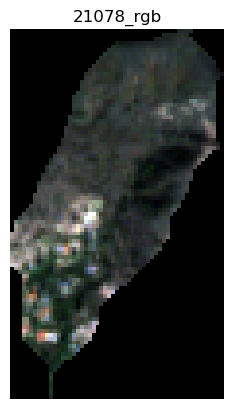

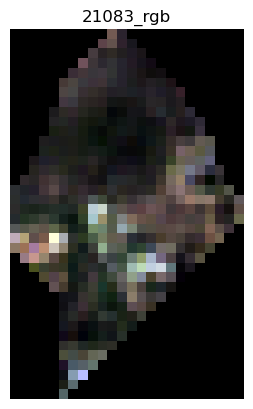

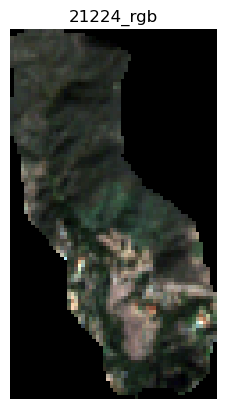

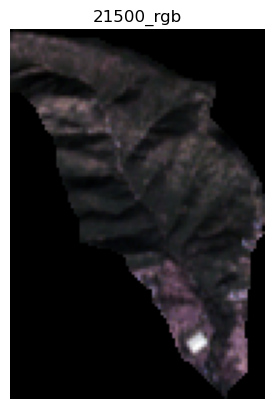

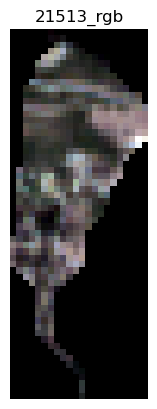

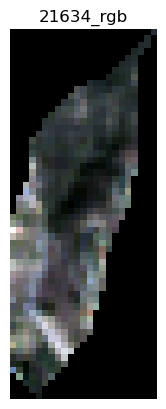

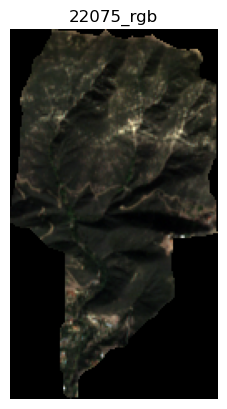

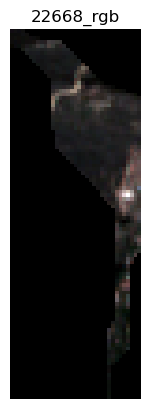

In [13]:
for filename in sorted(os.listdir(basins)):
    f = os.path.join(basins, filename)
    if filename.endswith('rgb.png'):
        b_name = filename.split('.')
        b_name_int = b_name[0]
        img = plt.imread(f)
        plt.imshow(img)
        plt.axis('off')
        plt.title(b_name_int)
        plt.show()

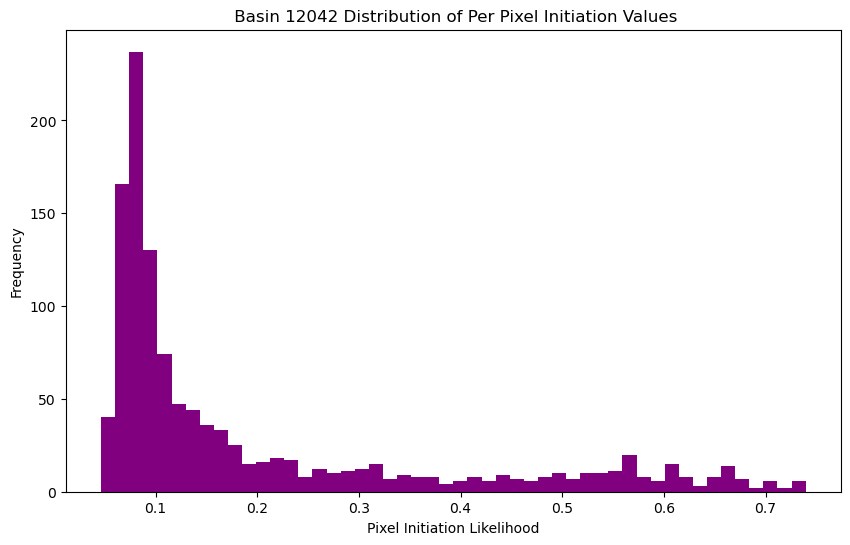

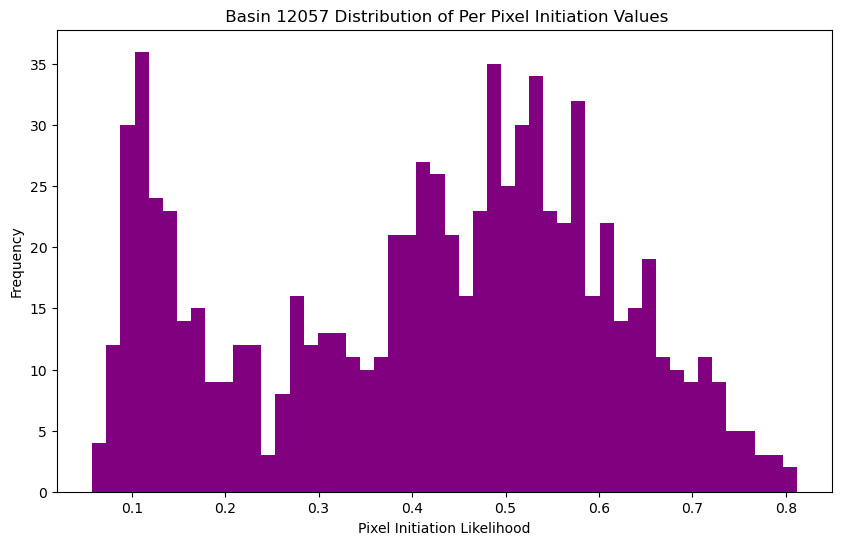

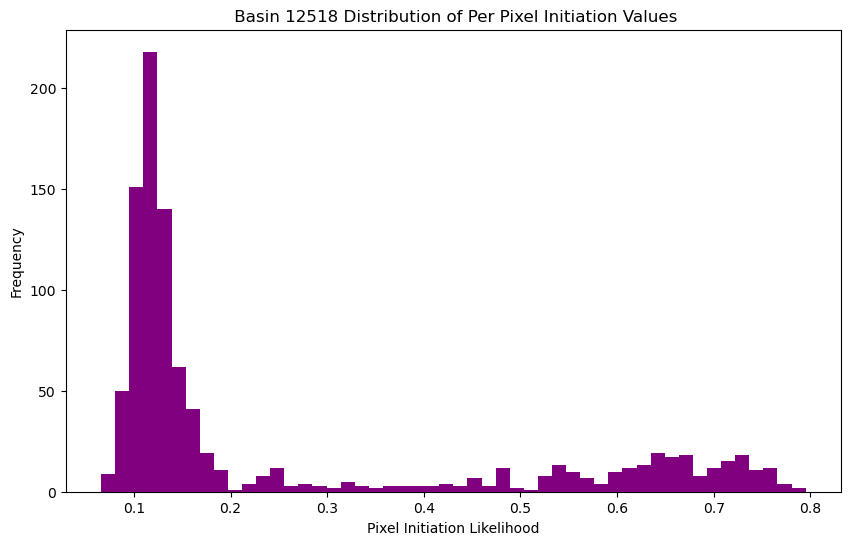

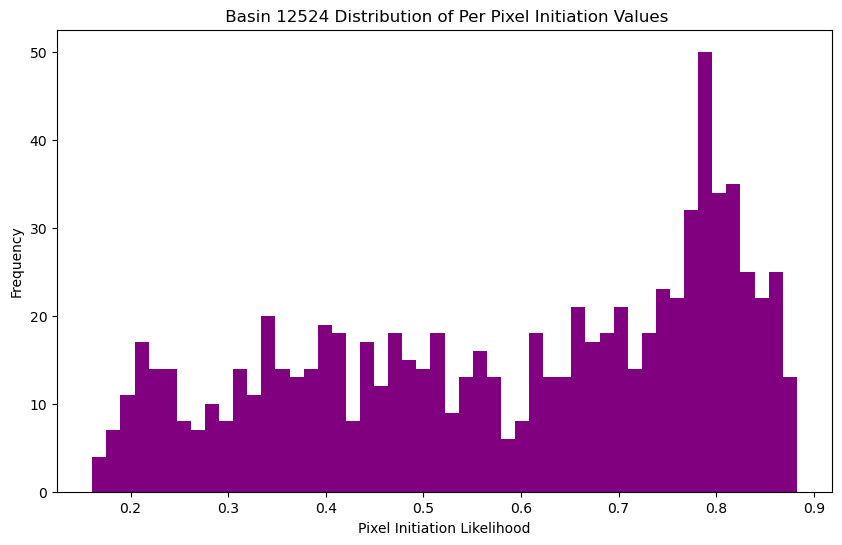

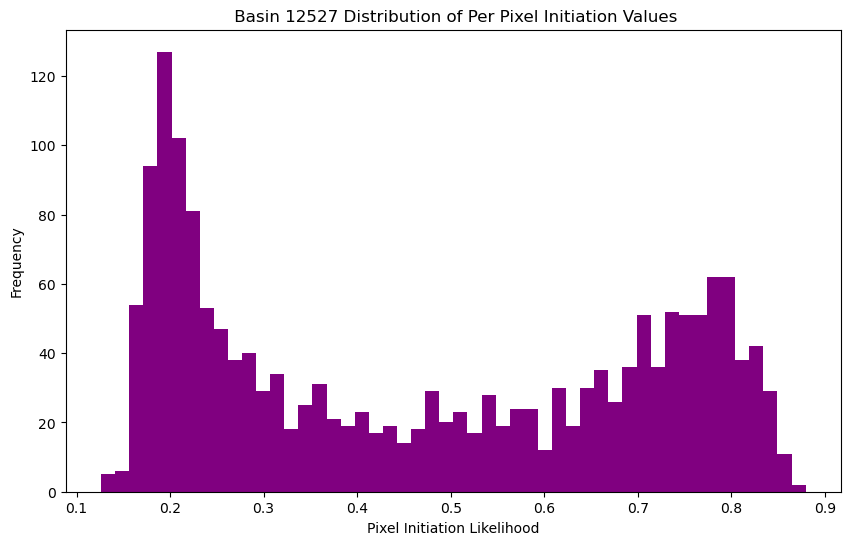

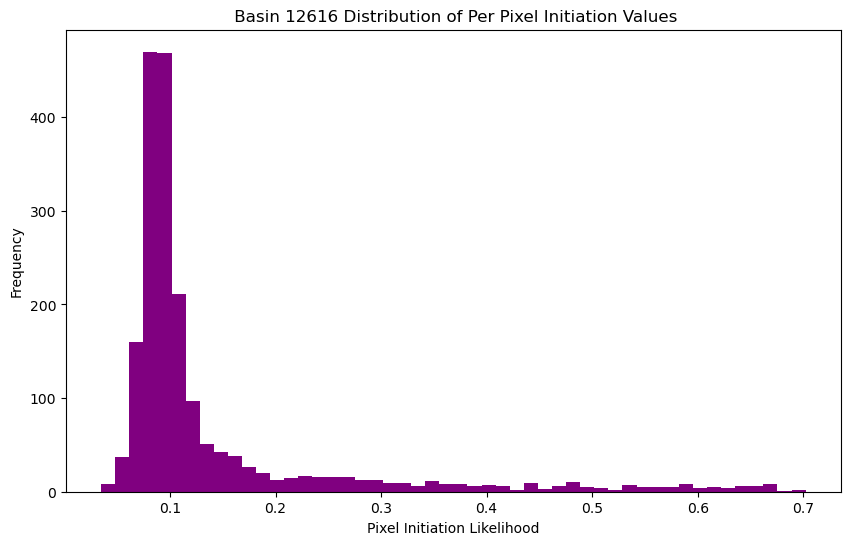

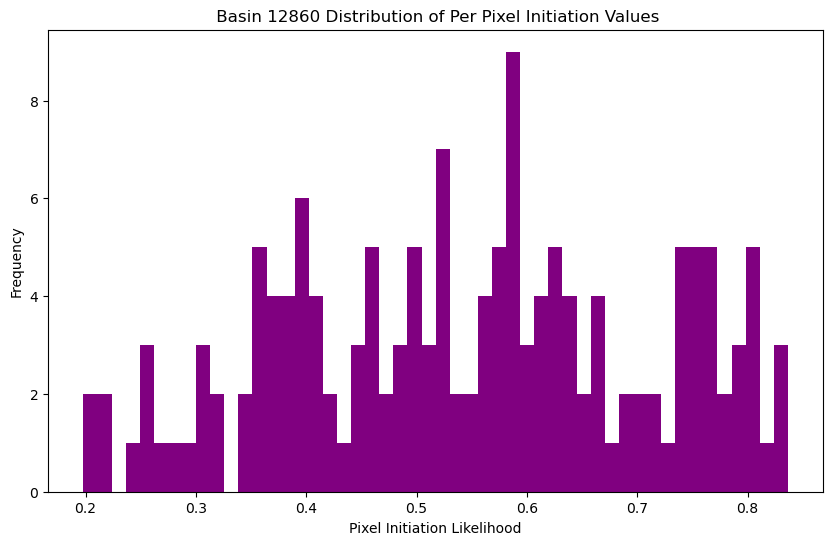

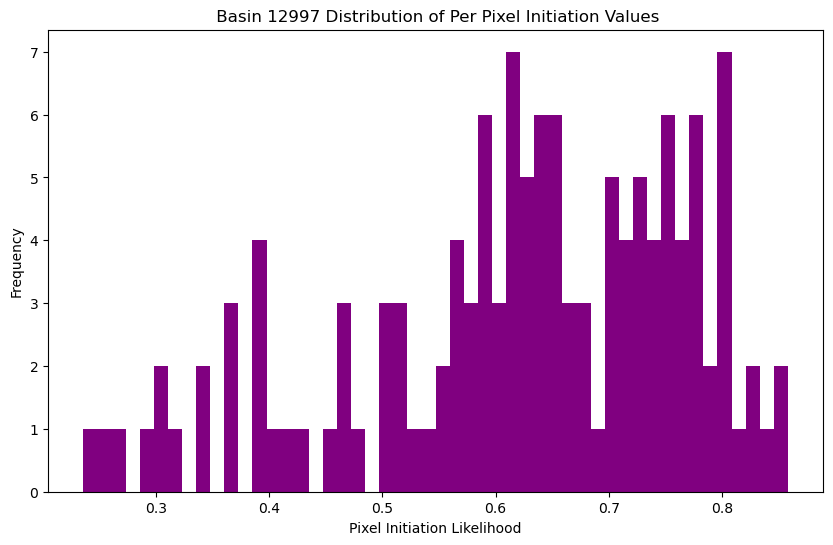

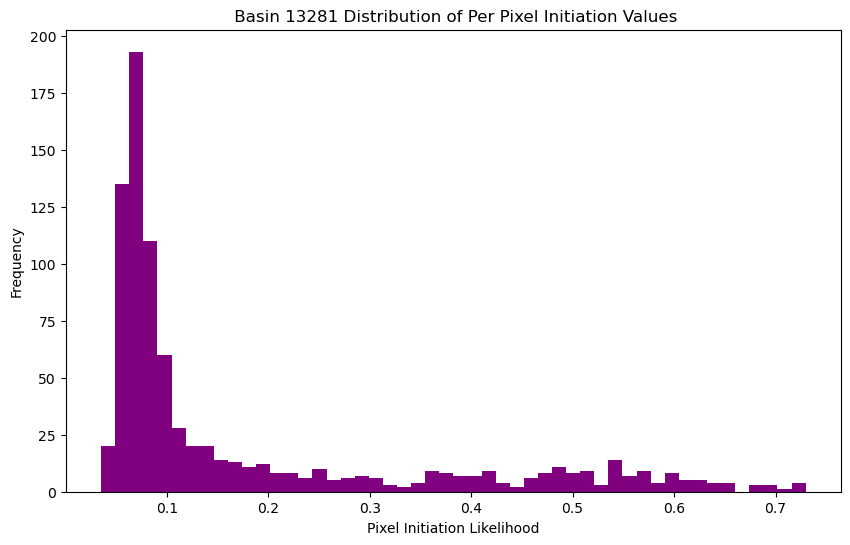

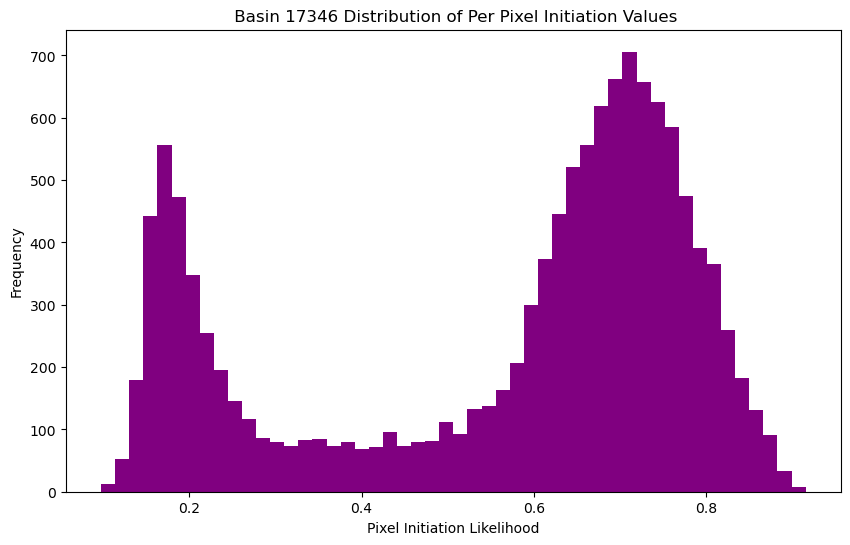

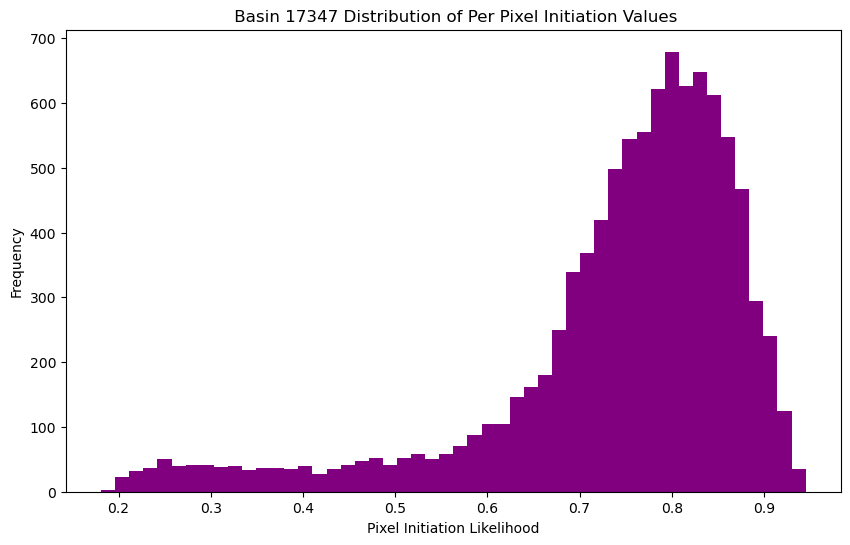

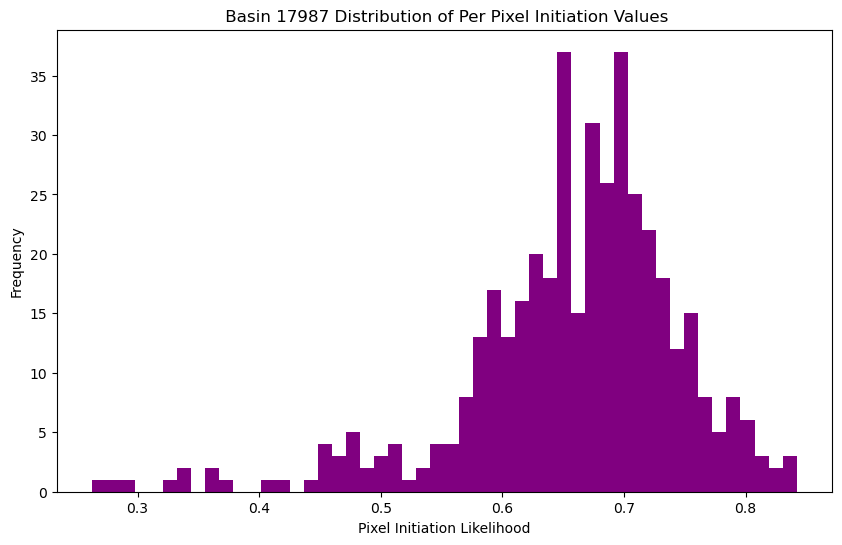

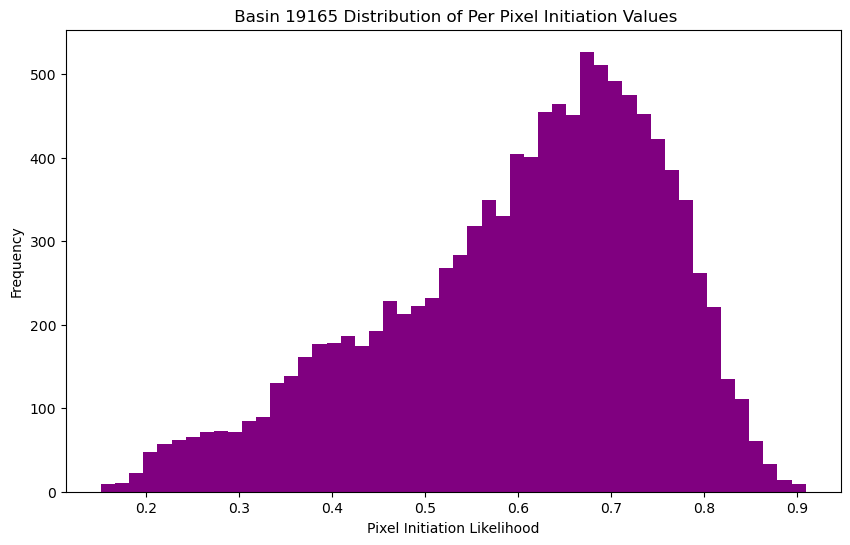

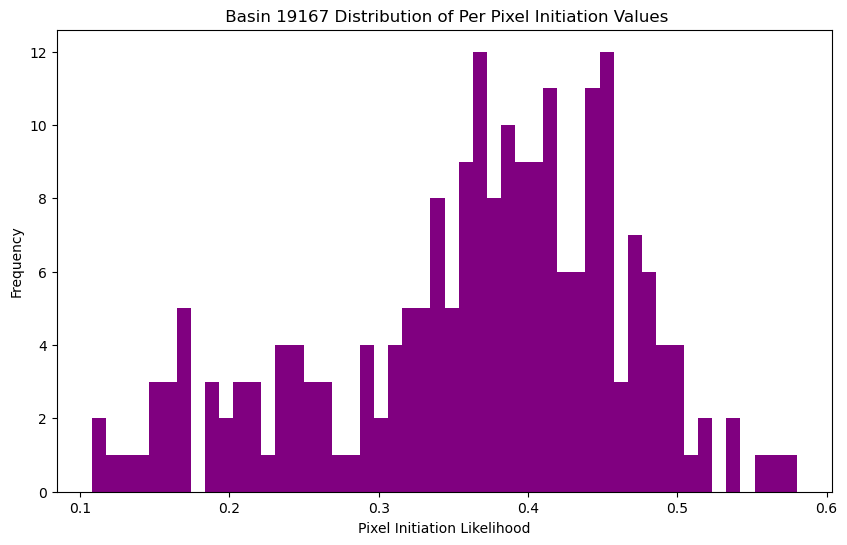

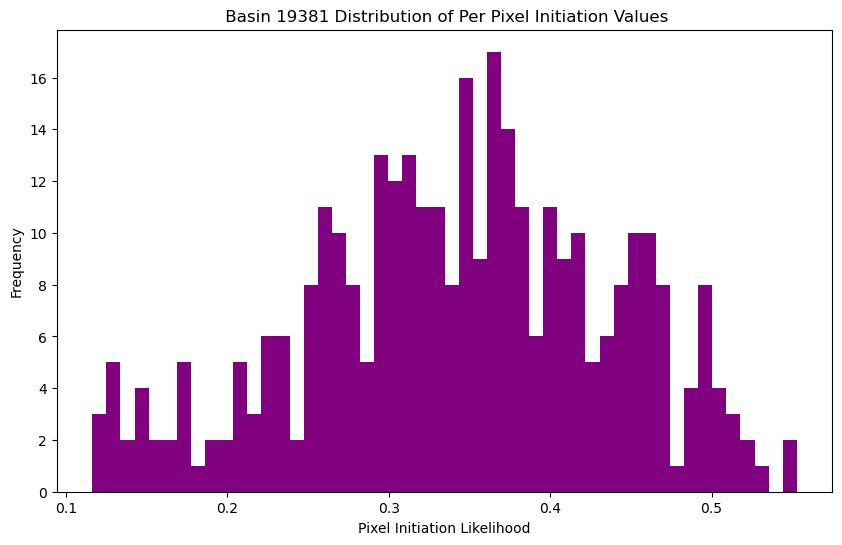

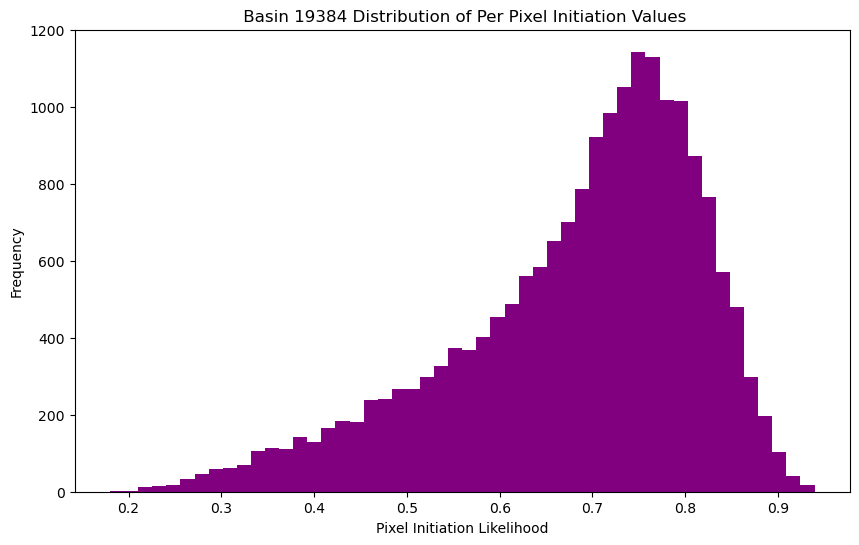

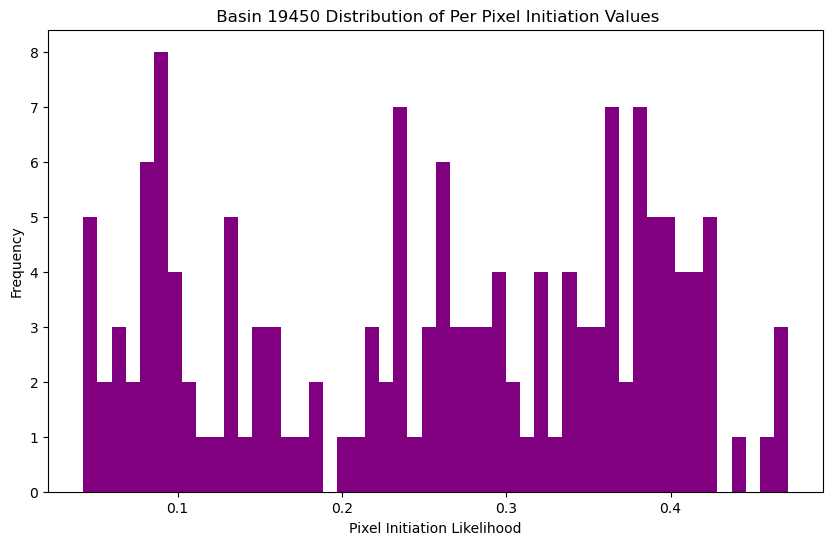

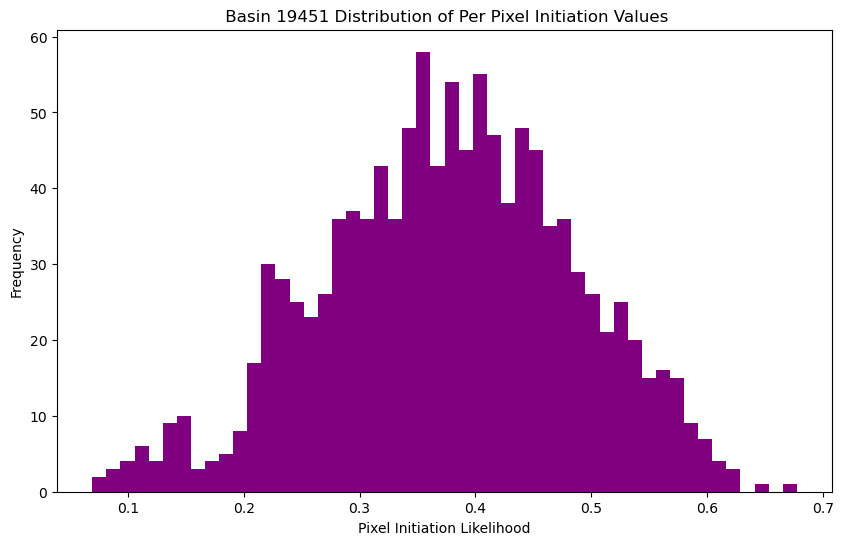

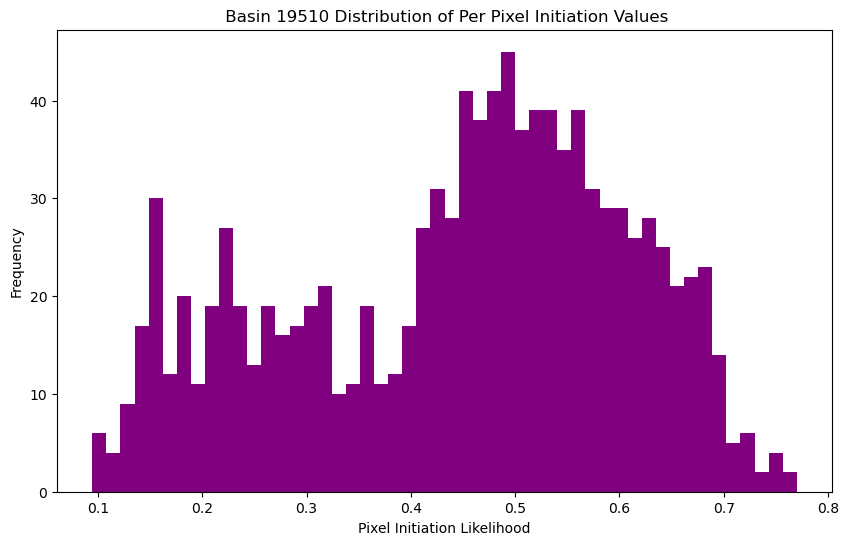

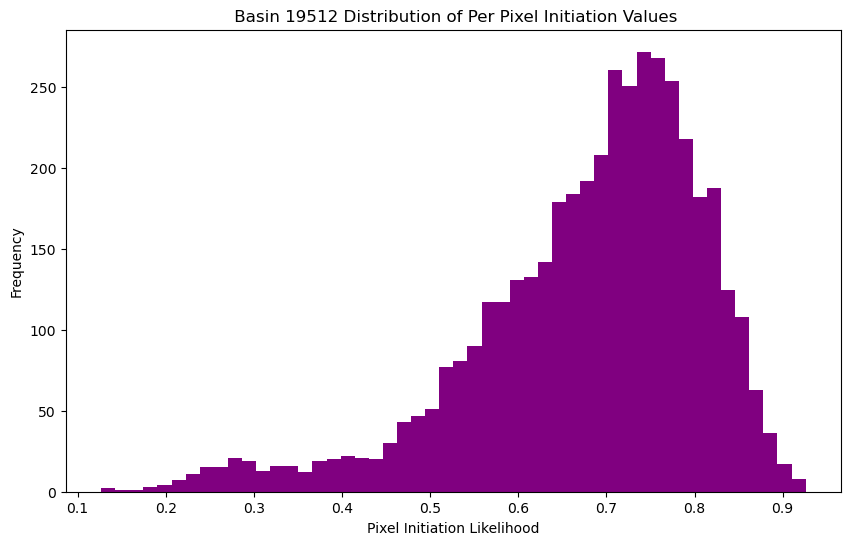

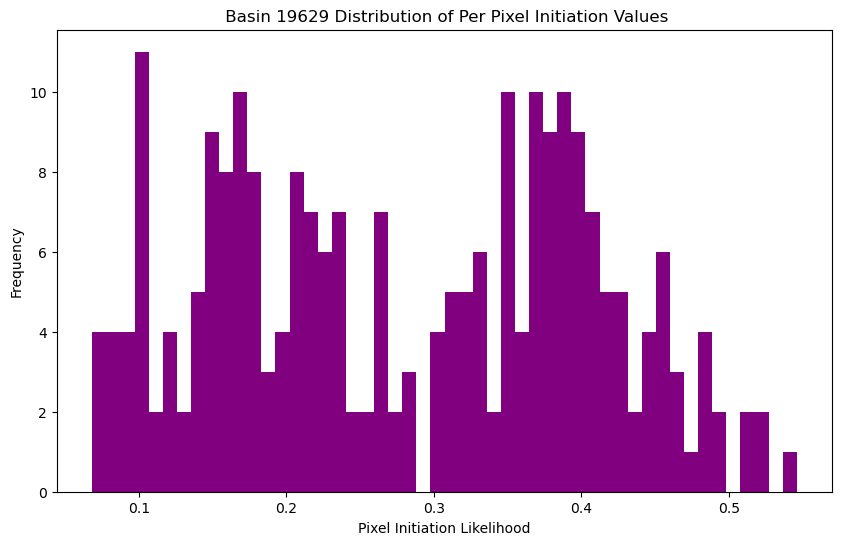

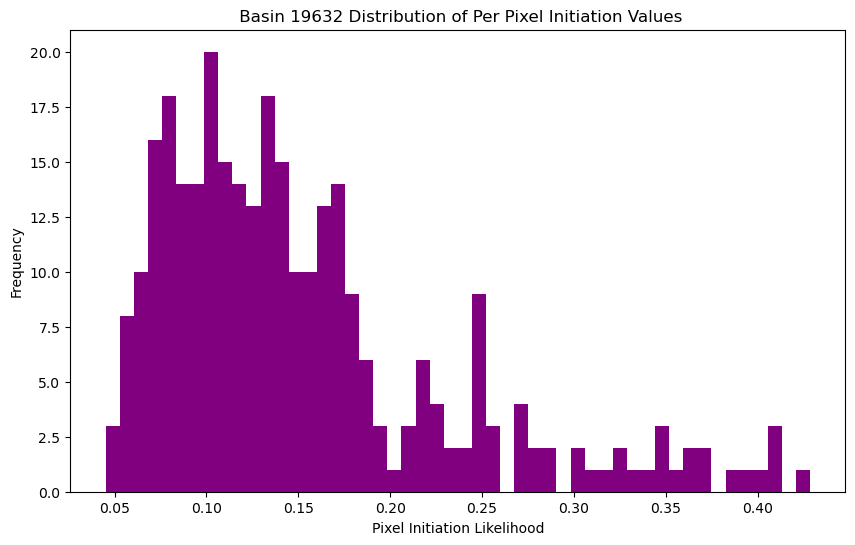

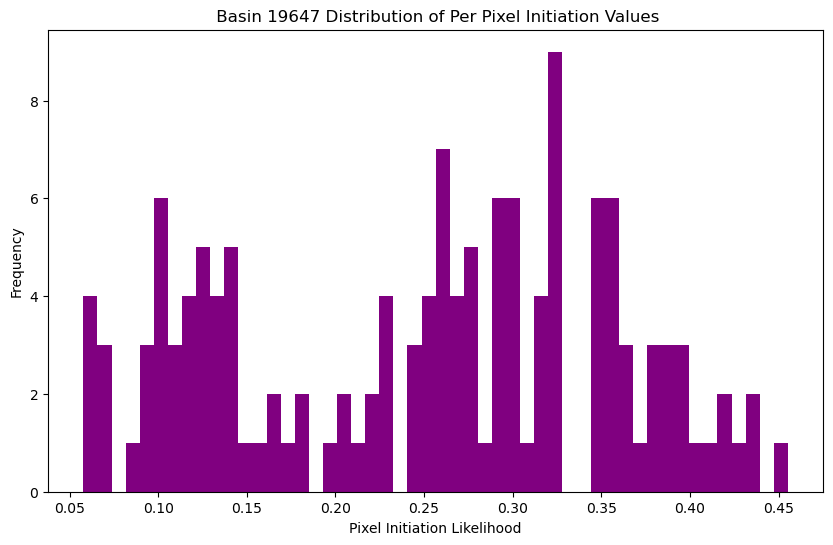

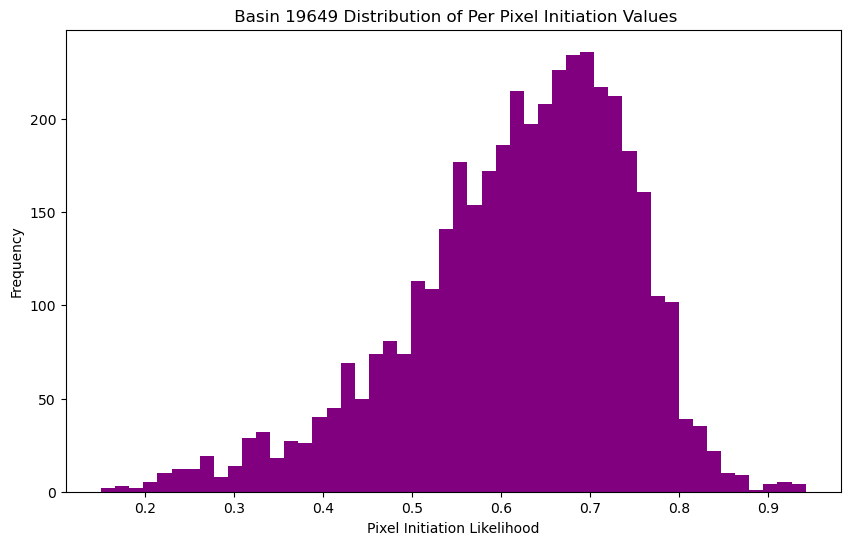

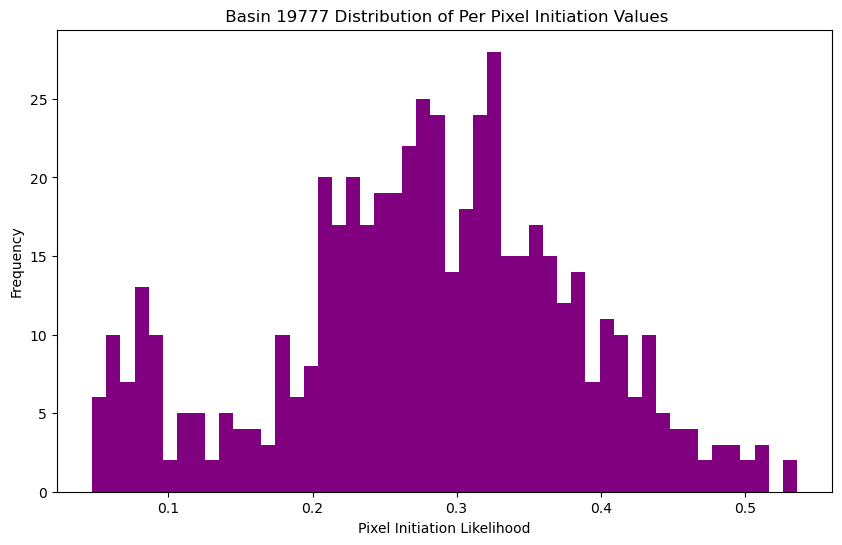

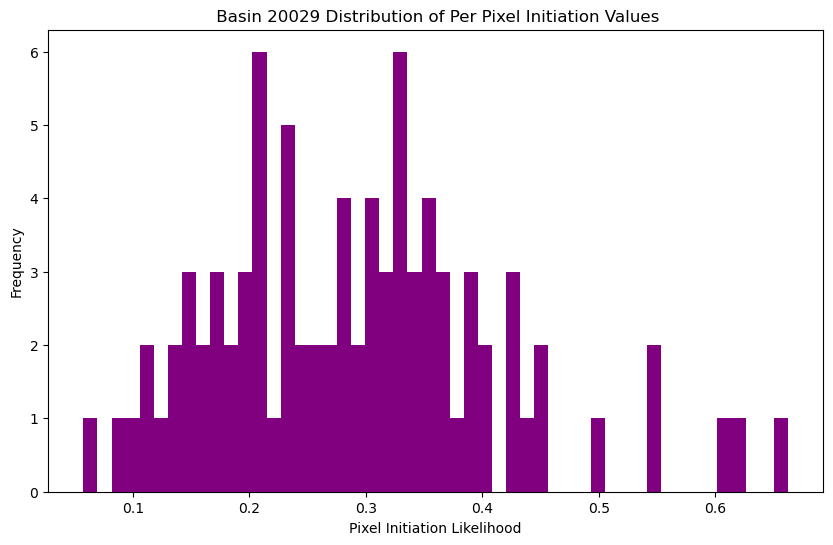

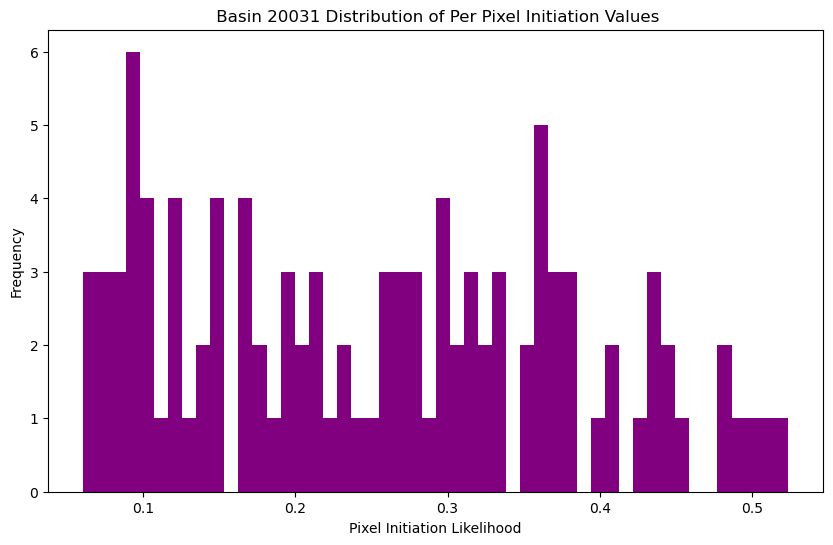

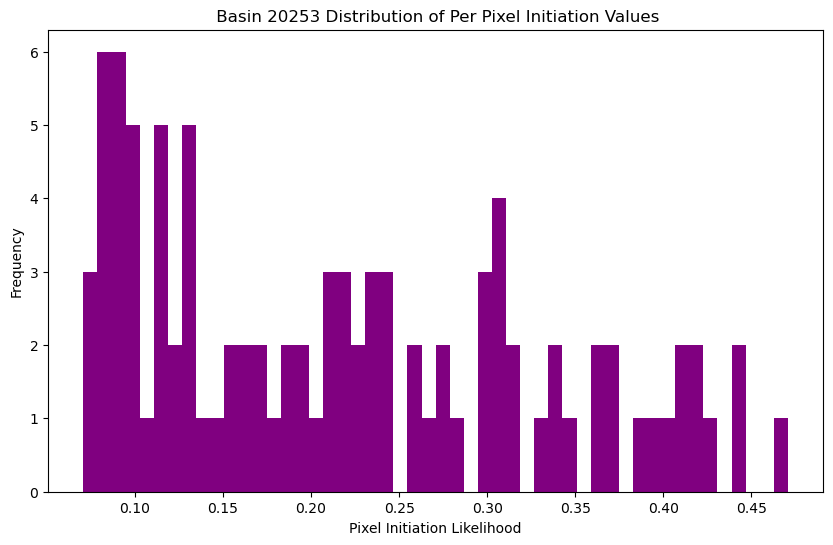

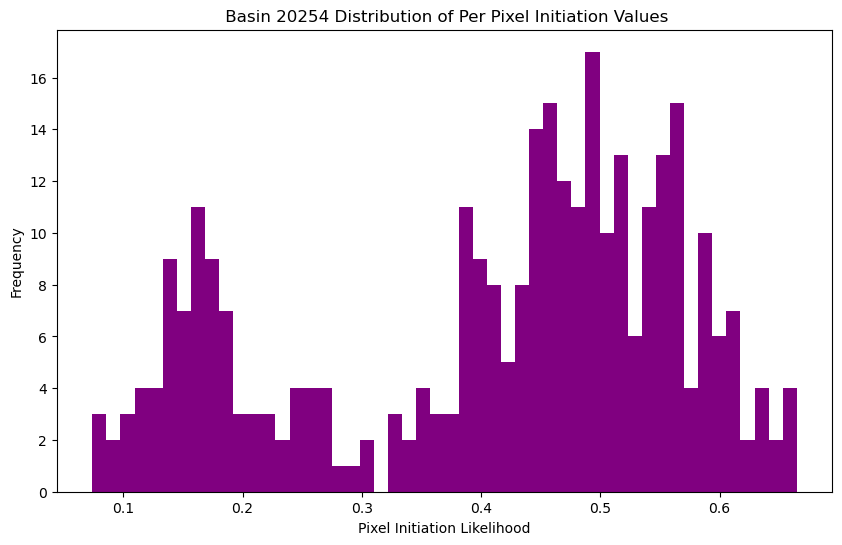

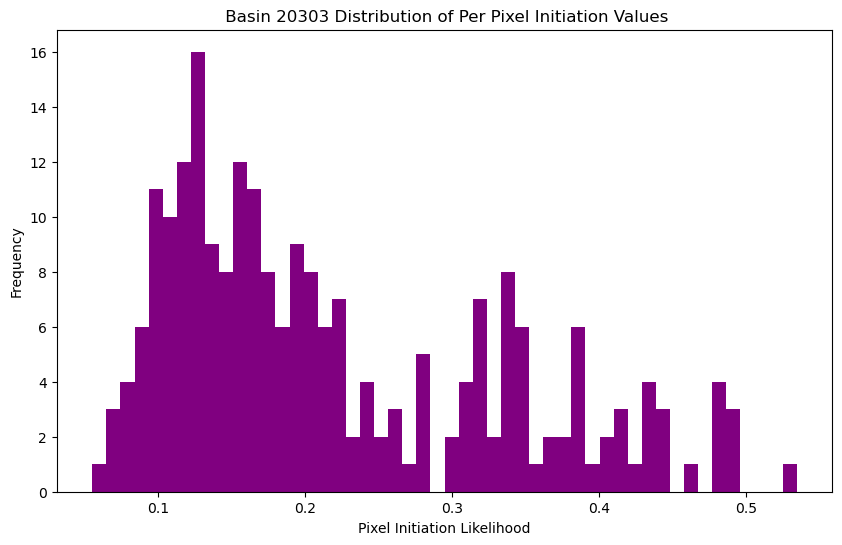

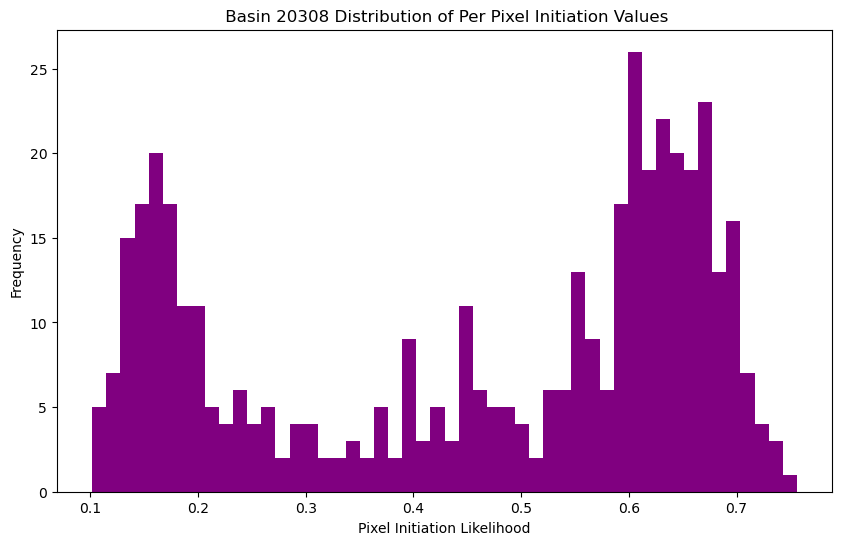

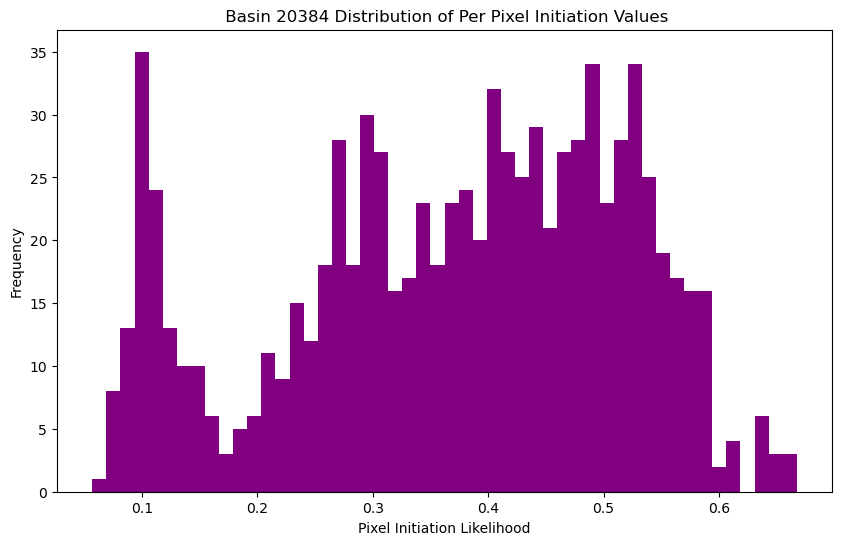

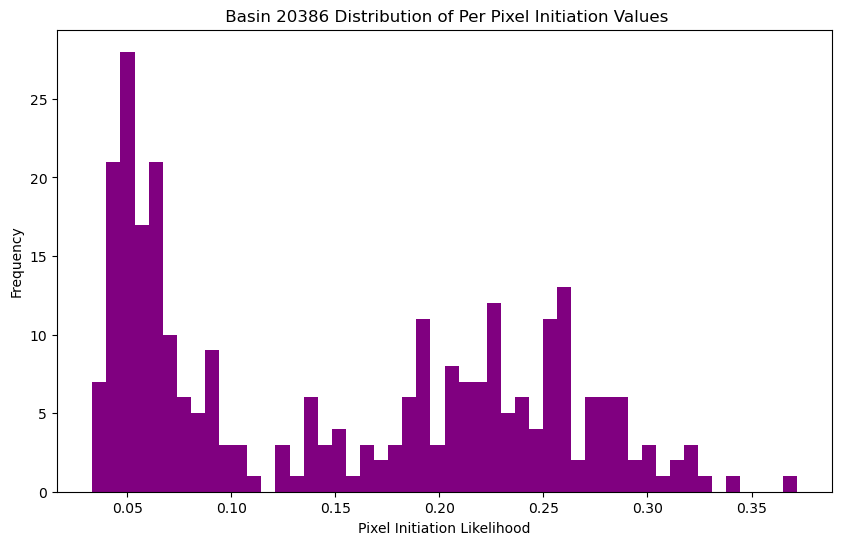

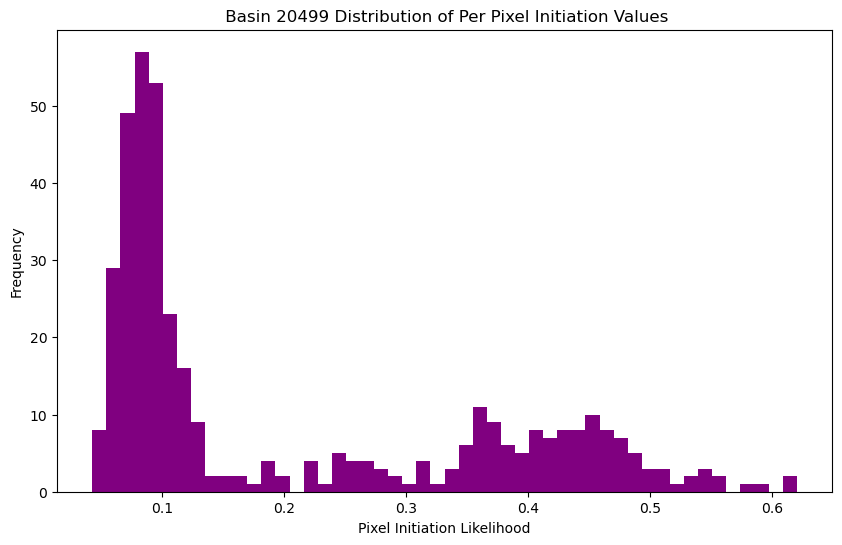

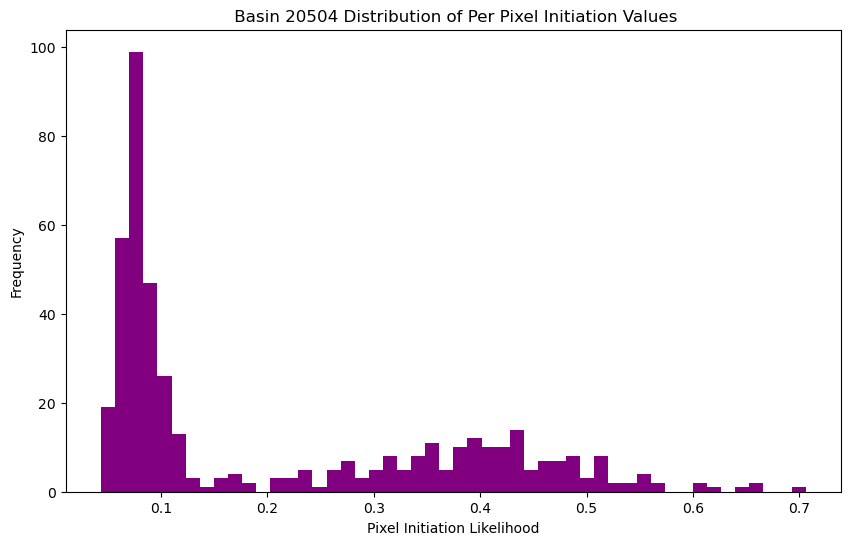

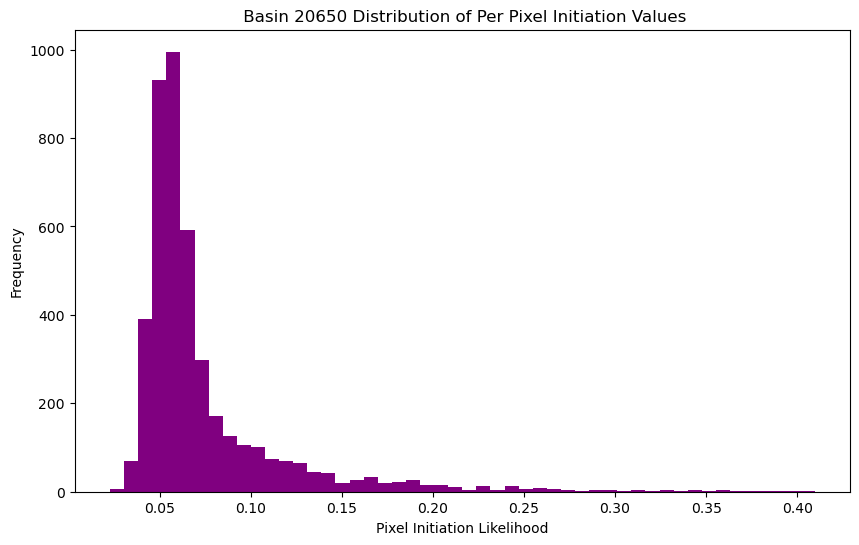

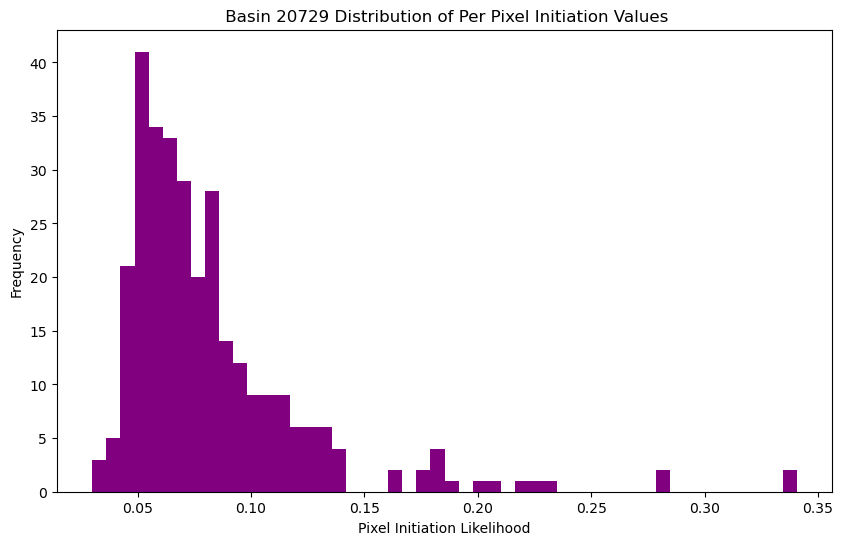

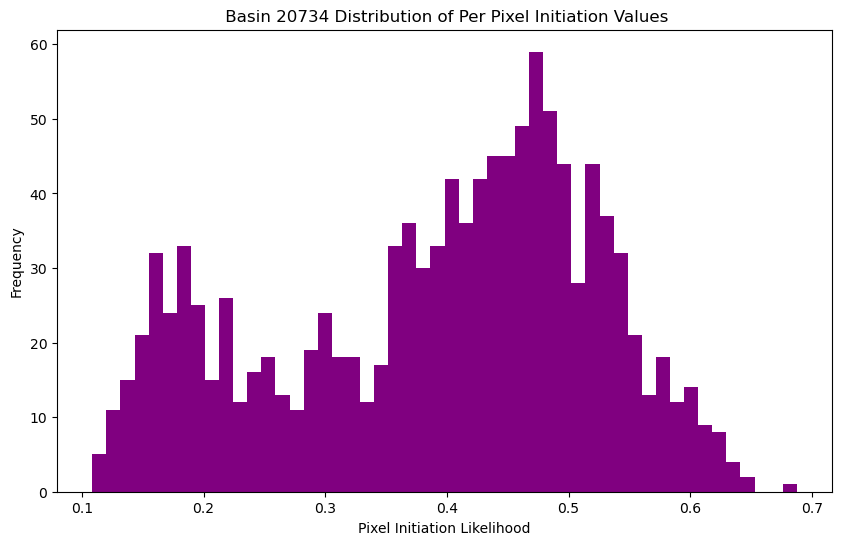

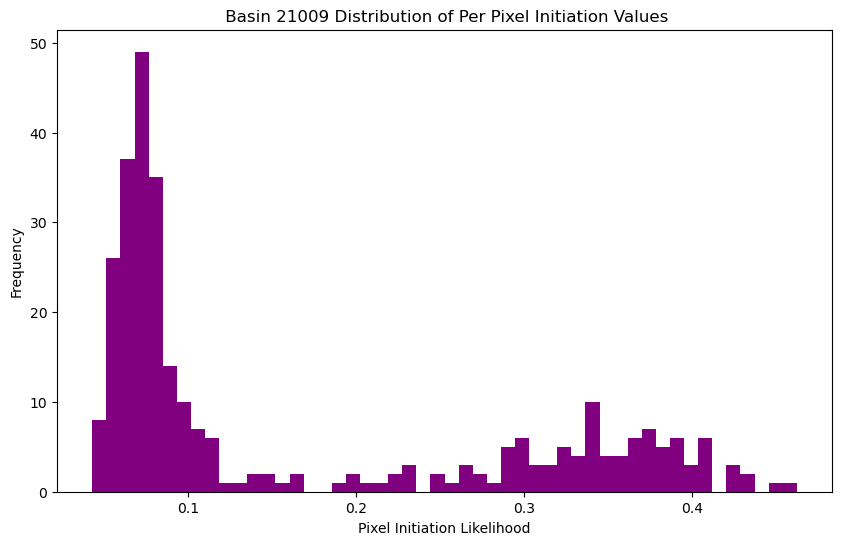

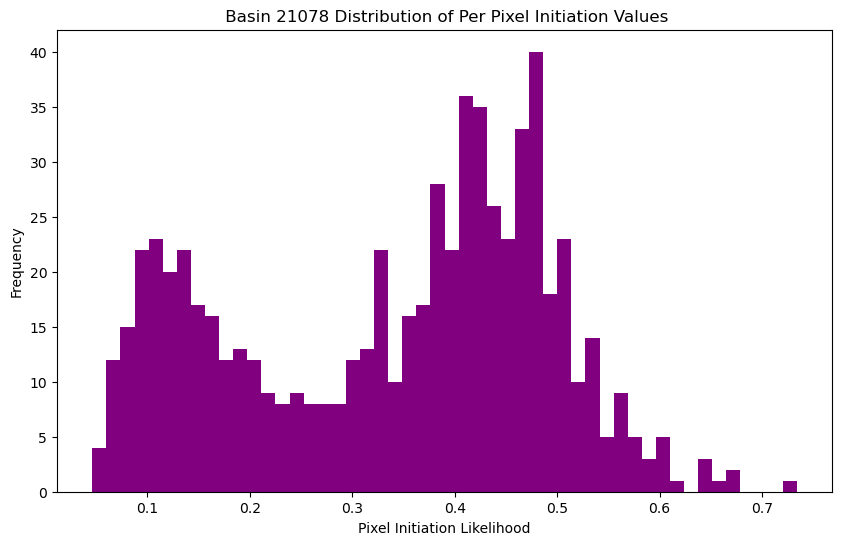

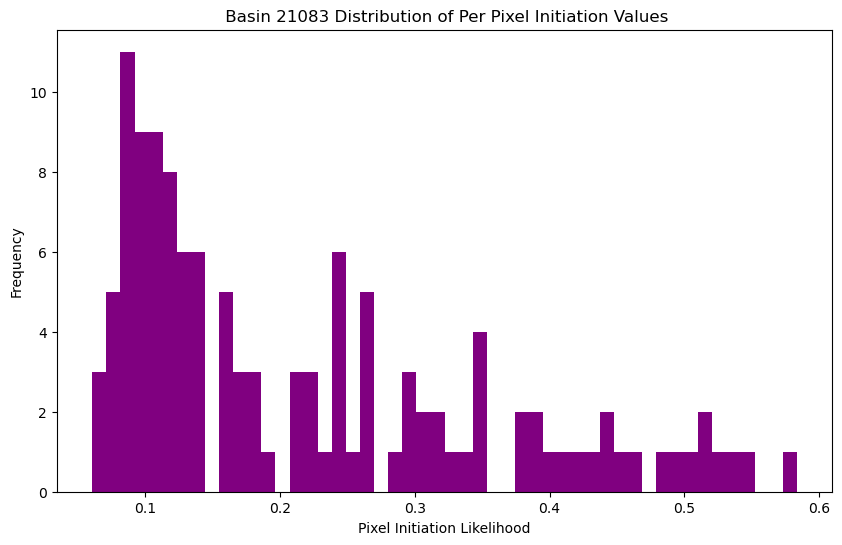

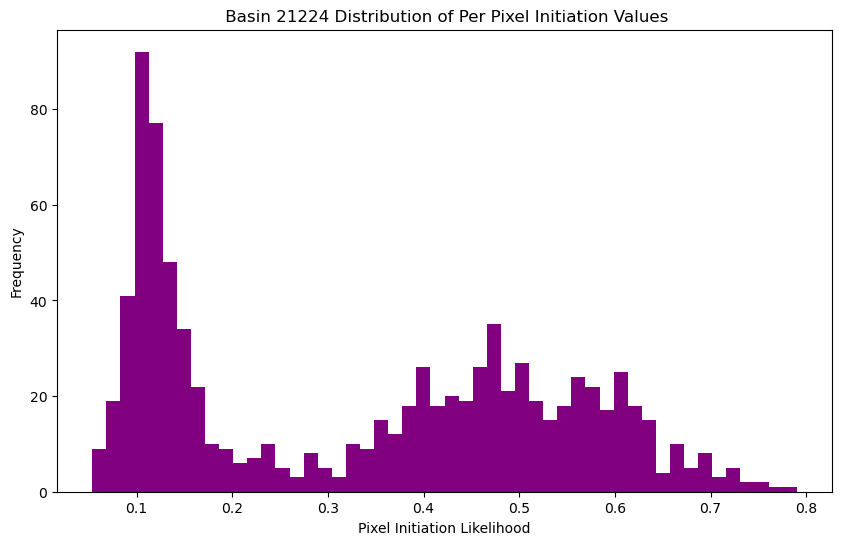

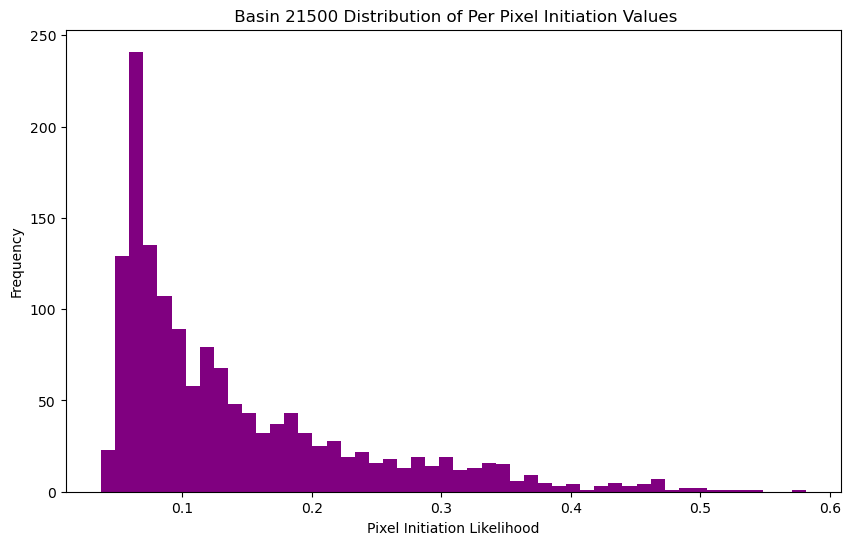

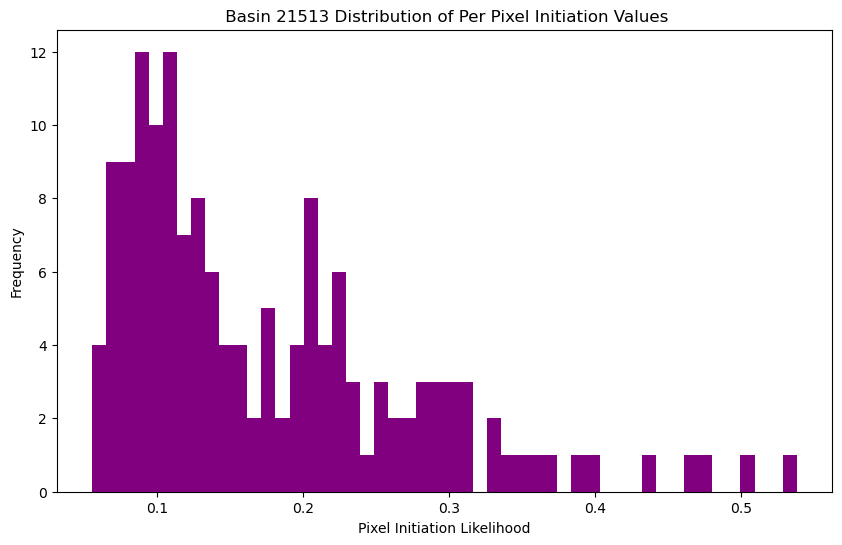

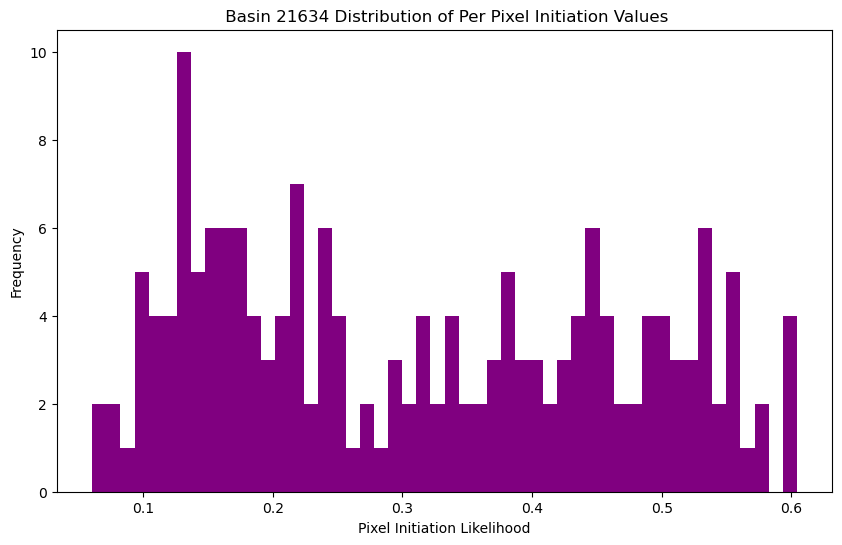

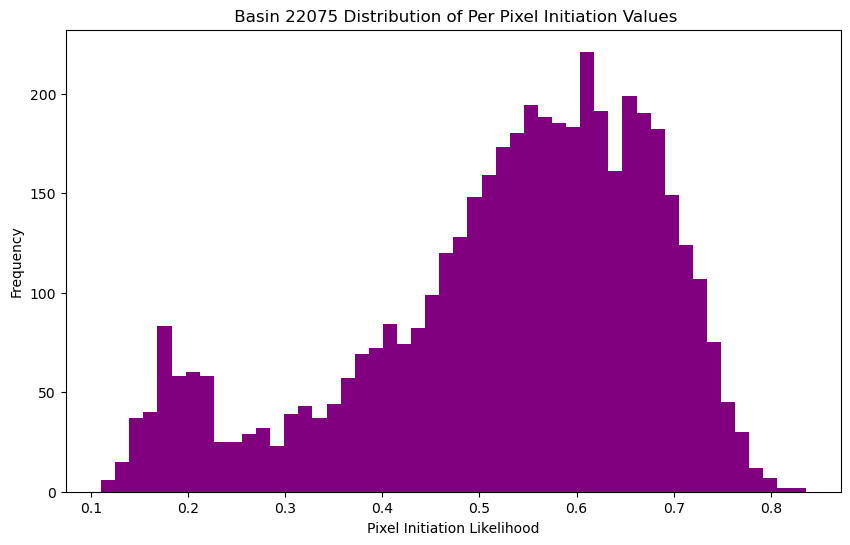

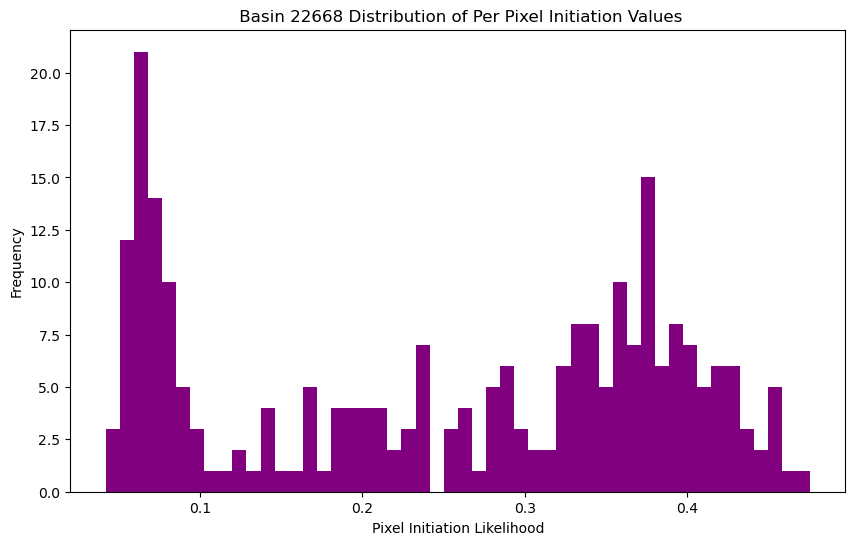

In [45]:
for filename in sorted(os.listdir(basins_P_pv)):
    f = os.path.join(basins_P_pv, filename)
    if filename.endswith('_prob_pv.tif'):
        # Set basin naming
        b_name = filename.split('_')
        b_name_int = b_name[0]
        
        prob = rxr.open_rasterio(f)
        a = np.mean(prob)
        f, ax = plt.subplots(figsize=(10, 6))
        prob.plot.hist(ax=ax,
                       color="purple",
                       bins = 50)
        ax.set(title= f" Basin {b_name_int} Distribution of Per Pixel Initiation Values",
        xlabel='Pixel Initiation Likelihood',
        ylabel='Frequency')
        plt.show()